# CS7641 Machine Learning Homework 1 - Supervised Learning - Dataset 2

## 1. Import Modules

In [1]:
# Basic Modules
import numpy as np
import matplotlib.pyplot as plt
import time

# Data Related Modules
import pandas as pd

# Data Processing
from sklearn.preprocessing import LabelEncoder

# Data Processing - Splitting Test / Train Data
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# MLP Neural Network
from sklearn.neural_network import MLPClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Validating the Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Optimization
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 2. Import Data

In [2]:
# Grab the data and convert csv to pandas dataframe.
messidor_df = pd.read_csv("messidor_features.csv")
messidor_df.head()

,quality,pre-screening,madetection1,madetection2,madetection3,madetection4,madetection5,madetection6,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,exudates8,euclideandistance,diameter,biaryresult,classes
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [3]:
# See how many columns and row is in the dataframe
messidor_df.shape

(1151, 20)

In [4]:
# See the column names
messidor_df.keys()

Index(['quality', 'pre-screening', 'madetection1', 'madetection2',
       'madetection3', 'madetection4', 'madetection5', 'madetection6',
       'exudates1', 'exudates2', 'exudates3', 'exudates4', 'exudates5',
       'exudates6', 'exudates7', 'exudates8', 'euclideandistance', 'diameter',
       'biaryresult', 'classes'],
      dtype='object')

In [5]:
# Remove unnecessary columns for the better dataframe. (Diagnosis in this case will be considered as a target (y))
X = messidor_df.drop(['classes'], axis=1)
X.head()

,quality,pre-screening,madetection1,madetection2,madetection3,madetection4,madetection5,madetection6,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,exudates8,euclideandistance,diameter,biaryresult
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


In [6]:
# Set diagnosis  as a target(y) and transform the letters into integer value
y = messidor_df.classes
# There are 762 authentic and 610 forgery in the database
np.bincount(y)

array([540, 611], dtype=int64)

In [7]:
# Split between the test and train dataset. test size will be 40% of the whole dataset, use the random seed 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

## 3. Decision Tree

In [8]:
# Construct the tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
# Predict with verification data
y_pred = decision_tree.predict(X_test)

In [10]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],138,78
True[1],107,138


In [11]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       216
           1       0.64      0.56      0.60       245

    accuracy                           0.60       461
   macro avg       0.60      0.60      0.60       461
weighted avg       0.60      0.60      0.60       461



In [12]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 185
Accuracy: 0.599
Precision: 0.639
Recall: 0.563
F1: 0.599


In [13]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

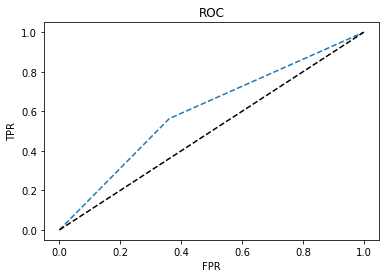

In [14]:
# Graph ROC curve based on f1 score
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [15]:
# Cross Validation
scores = cross_validate(estimator=decision_tree, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.574 +/- 0.026


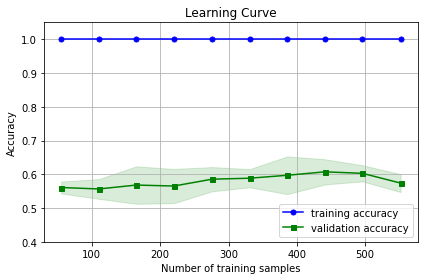

In [16]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=decision_tree, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

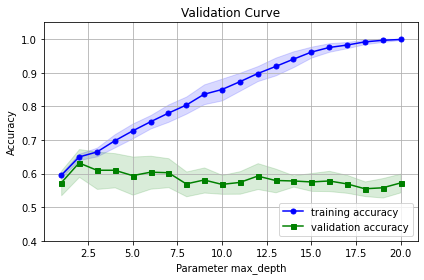

In [17]:
# Validation Curve
param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_scores, test_scores = validation_curve(estimator=decision_tree, X=X_train, y=y_train, param_name='max_depth',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()



In [18]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [19]:
# Hyperparameter Tuning
param_range1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

param_grid = [{'max_depth': param_range1}]

gs = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 1.217
Best Score: 0.632
Best Parameter: {'max_depth': 2}


In [20]:
# Verifying Optimal Model
best_tree = gs.best_estimator_
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [21]:
# Predicting with the verification data
y_pred = best_tree.predict(X_test)

In [22]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],183,33
True[1],133,112


In [23]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69       216
           1       0.77      0.46      0.57       245

    accuracy                           0.64       461
   macro avg       0.68      0.65      0.63       461
weighted avg       0.68      0.64      0.63       461



In [24]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 166
Accuracy: 0.640
Precision: 0.772
Recall: 0.457
F1: 0.574


In [25]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

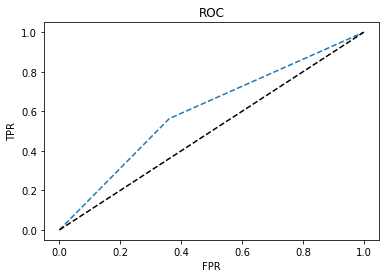

In [26]:
# Graph ROC curve based on f1 score
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [27]:
# Cross Validation
scores = cross_validate(estimator=best_tree, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.632 +/- 0.041


## 4. Neural Network

In [28]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [29]:
y_pred = mlp.predict(X_test)

In [30]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],184,32
True[1],82,163


In [31]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       216
           1       0.84      0.67      0.74       245

    accuracy                           0.75       461
   macro avg       0.76      0.76      0.75       461
weighted avg       0.77      0.75      0.75       461



In [32]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 114
Accuracy: 0.753
Precision: 0.836
Recall: 0.665
F1: 0.741


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])

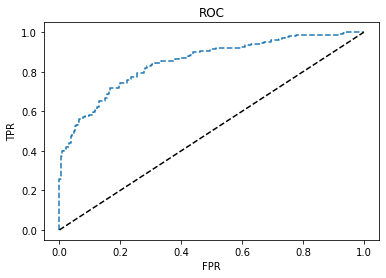

In [34]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [35]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.730 +/- 0.031


In [36]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

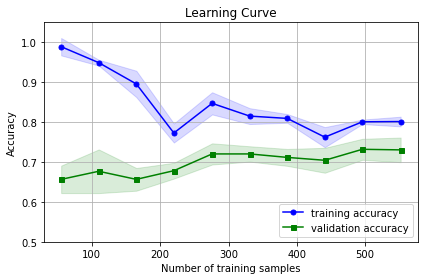

In [37]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

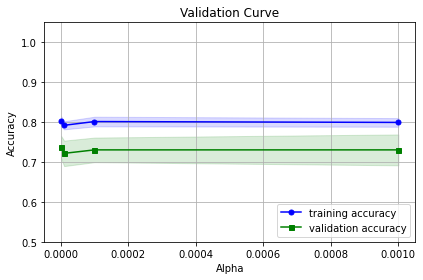

In [38]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

In [39]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 9.295
Best Score: 0.725
Best Parameter: {'alpha': 1e-05, 'hidden_layer_sizes': (10, 10)}


In [40]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=1000,
              random_state=1)

In [41]:
# Predicting with the verification data
y_pred = best_mlp.predict(X_test)

In [42]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],168,48
True[1],68,177


In [43]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       216
           1       0.79      0.72      0.75       245

    accuracy                           0.75       461
   macro avg       0.75      0.75      0.75       461
weighted avg       0.75      0.75      0.75       461



In [44]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 116
Accuracy: 0.748
Precision: 0.787
Recall: 0.722
F1: 0.753


In [45]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])

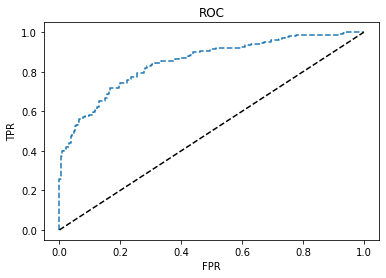

In [46]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [47]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.725 +/- 0.028


## 5. Support Vector Machine

In [48]:
svm = SVC(kernel='linear', random_state=1, probability = True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [49]:
y_pred = svm.predict(X_test)

In [50]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],191,25
True[1],91,154


In [51]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       216
           1       0.86      0.63      0.73       245

    accuracy                           0.75       461
   macro avg       0.77      0.76      0.75       461
weighted avg       0.77      0.75      0.75       461



In [52]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 116
Accuracy: 0.748
Precision: 0.860
Recall: 0.629
F1: 0.726


In [53]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

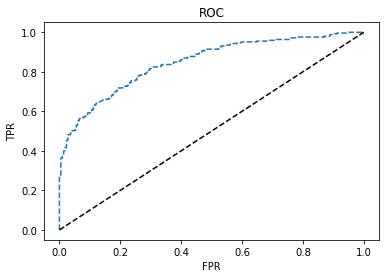

In [54]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [55]:
# Cross Validation
scores = cross_validate(estimator=svm, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.730 +/- 0.012


In [56]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

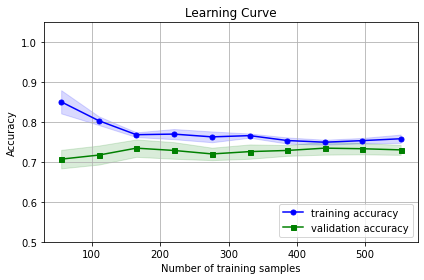

In [57]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

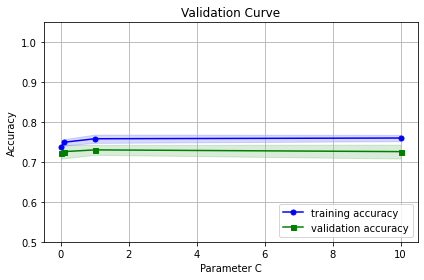

In [58]:
# Validation Curve

param_range=[0.01,0.1,1.0,10]

train_scores, test_scores = validation_curve(estimator=svm, X=X_train, y=y_train, param_name='C',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

In [59]:
# Hyperparameter Tuning
param_range=[0.01,0.1,1.0,10]

param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=svm, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 63.139
Best Score: 0.730
Best Parameter: {'C': 1.0}


In [60]:
# Verifying Optimal Model
best_svm = gs.best_estimator_
best_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [61]:
# Predicting with the verification data
y_pred = best_svm.predict(X_test)

In [62]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],191,25
True[1],91,154


In [63]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       216
           1       0.86      0.63      0.73       245

    accuracy                           0.75       461
   macro avg       0.77      0.76      0.75       461
weighted avg       0.77      0.75      0.75       461



In [64]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 116
Accuracy: 0.748
Precision: 0.860
Recall: 0.629
F1: 0.726


In [65]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

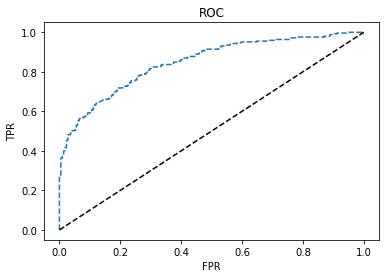

In [66]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [67]:
# Cross Validation
scores = cross_validate(estimator=best_svm, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.730 +/- 0.012


In [68]:
svm2 = SVC(kernel='rbf', random_state=1, C=0.1, probability = True)
svm2.fit(X_train, y_train)

SVC(C=0.1, probability=True, random_state=1)

In [69]:
y_pred = svm2.predict(X_test)

In [70]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],131,85
True[1],88,157


In [71]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       216
           1       0.65      0.64      0.64       245

    accuracy                           0.62       461
   macro avg       0.62      0.62      0.62       461
weighted avg       0.63      0.62      0.62       461



In [72]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 173
Accuracy: 0.625
Precision: 0.649
Recall: 0.641
F1: 0.645


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

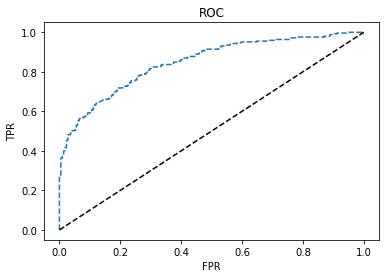

In [74]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [75]:
# Cross Validation
scores = cross_validate(estimator=svm2, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.614 +/- 0.013


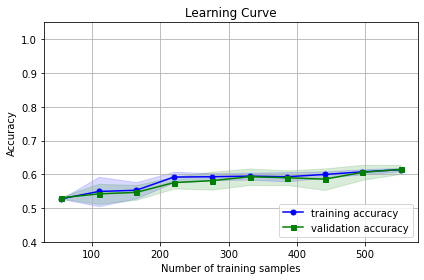

In [76]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm2, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

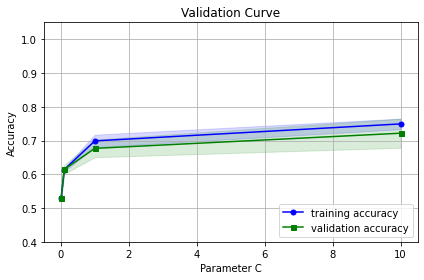

In [77]:
# Validation Curve

param_range=[0.01,0.1,1.0,10]

train_scores, test_scores = validation_curve(estimator=svm2, X=X_train, y=y_train, param_name='C',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

In [78]:
# Hyperparameter Tuning
param_range=[0.01,0.1,1.0,10]

param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=svm2, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 0.210
Best Score: 0.722
Best Parameter: {'C': 10}


In [79]:
# Verifying Optimal Model
best_svm2 = gs.best_estimator_
best_svm2.fit(X_train, y_train)

SVC(C=10, probability=True, random_state=1)

In [80]:
# Predicting with the verification data
y_pred = best_svm2.predict(X_test)

In [81]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],187,29
True[1],101,144


In [82]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       216
           1       0.83      0.59      0.69       245

    accuracy                           0.72       461
   macro avg       0.74      0.73      0.72       461
weighted avg       0.75      0.72      0.71       461



In [83]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 130
Accuracy: 0.718
Precision: 0.832
Recall: 0.588
F1: 0.689


In [84]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

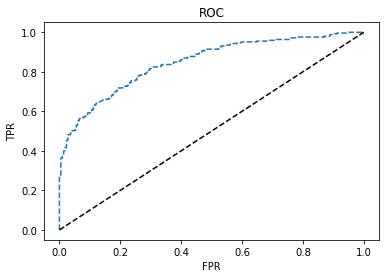

In [85]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [86]:
# Cross Validation
scores = cross_validate(estimator=best_svm2, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.722 +/- 0.043


## 6. AdaBoosting

In [87]:
boost_tree = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=1)
adaboost = AdaBoostClassifier(base_estimator=boost_tree, random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   random_state=1)

In [88]:
y_pred = adaboost.predict(X_test)

In [89]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],148,68
True[1],92,153


In [90]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       216
           1       0.69      0.62      0.66       245

    accuracy                           0.65       461
   macro avg       0.65      0.65      0.65       461
weighted avg       0.66      0.65      0.65       461



In [91]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 160
Accuracy: 0.653
Precision: 0.692
Recall: 0.624
F1: 0.657


In [92]:
fpr, tpr, thresholds = roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])

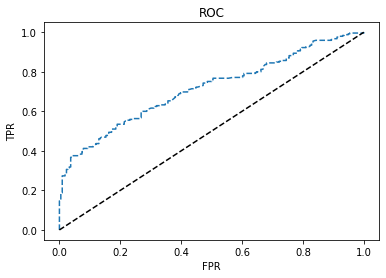

In [93]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [94]:
# Cross Validation
scores = cross_validate(estimator=adaboost, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.626 +/- 0.031


In [95]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

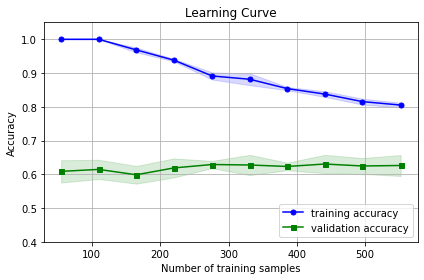

In [96]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=adaboost, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

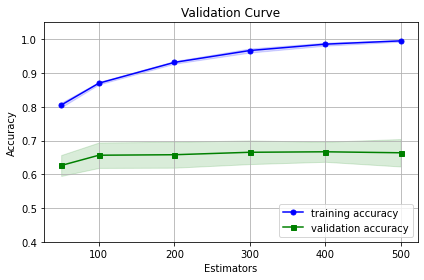

In [97]:
# Validation Curve

param_range=[50,100,200,300,400,500]

train_scores, test_scores = validation_curve(estimator=adaboost, X=X_train, y=y_train, param_name='n_estimators',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

In [98]:
# Hyperparameter Tuning
param_range=[50, 100, 200, 300, 400, 500]
param_grid = [{'n_estimators': param_range}]

gs = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.529
Best Score: 0.667
Best Parameter: {'n_estimators': 400}


In [99]:
# Verifying Optimal Model
best_adaboost = gs.best_estimator_
best_adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   n_estimators=400, random_state=1)

In [100]:
# Predicting with the verification data
y_pred = best_adaboost.predict(X_test)

In [101]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],139,77
True[1],78,167


In [102]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       216
           1       0.68      0.68      0.68       245

    accuracy                           0.66       461
   macro avg       0.66      0.66      0.66       461
weighted avg       0.66      0.66      0.66       461



In [103]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 155
Accuracy: 0.664
Precision: 0.684
Recall: 0.682
F1: 0.683


In [104]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])

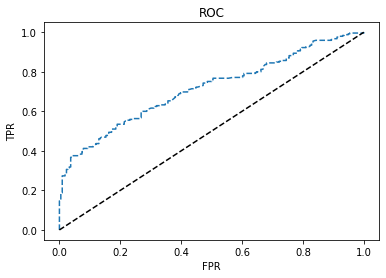

In [105]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [106]:
# Cross Validation
scores = cross_validate(estimator=best_adaboost, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.667 +/- 0.030


## 7. KNN

In [107]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [108]:
y_pred = knn.predict(X_test)

In [109]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],144,72
True[1],93,152


In [110]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       216
           1       0.68      0.62      0.65       245

    accuracy                           0.64       461
   macro avg       0.64      0.64      0.64       461
weighted avg       0.65      0.64      0.64       461



In [111]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 165
Accuracy: 0.642
Precision: 0.679
Recall: 0.620
F1: 0.648


In [112]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

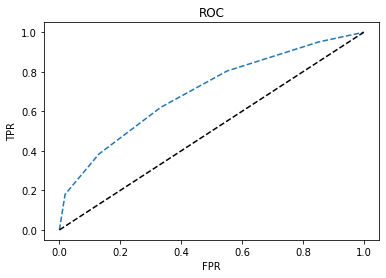

In [113]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [114]:
# Cross Validation
scores = cross_validate(estimator=knn, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.636 +/- 0.032


In [115]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

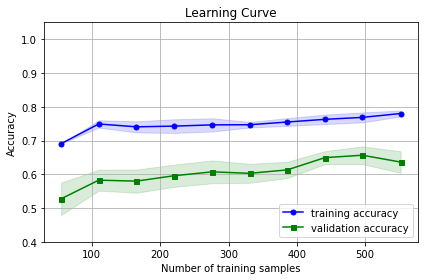

In [116]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

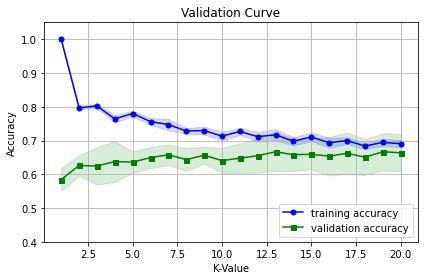

In [117]:
# Validation Curve

param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, test_scores = validation_curve(estimator=knn, X=X_train, y=y_train, param_name='n_neighbors',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()

In [118]:
# Hyperparameter Tuning
param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = [{'n_neighbors': param_range}]

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 0.164
Best Score: 0.667
Best Parameter: {'n_neighbors': 13}


In [119]:
# Verifying Optimal Model
best_knn = gs.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [120]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],144,72
True[1],93,152


In [121]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       216
           1       0.68      0.62      0.65       245

    accuracy                           0.64       461
   macro avg       0.64      0.64      0.64       461
weighted avg       0.65      0.64      0.64       461



In [122]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 165
Accuracy: 0.642
Precision: 0.679
Recall: 0.620
F1: 0.648


In [123]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

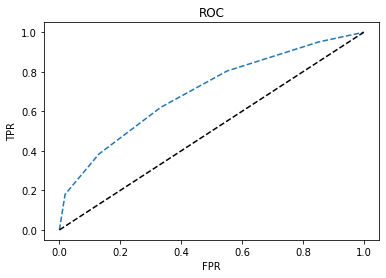

In [124]:
plt.plot(fpr, tpr, '--', label="Support Vector Machine")
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.plot([fpr],[tpr],'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [125]:
# Cross Validation
scores = cross_validate(estimator=best_knn, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.667 +/- 0.057
